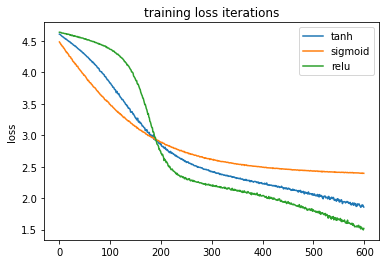

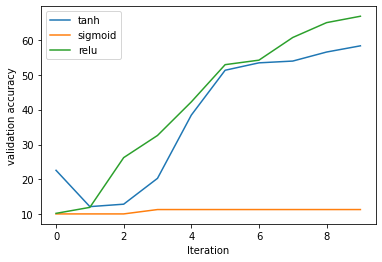

In [14]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pylab as plt
from torch import optim
import numpy as np
torch.manual_seed(2)


class Net(nn.Module):
  def __init__(self,in_,n1,n2,out_):
    super(Net,self).__init__()
    self.linear1 = nn.Linear(in_,n1)
    self.linear2 = nn.Linear(n1,n2)
    self.linear3 = nn.Linear(n2,out_)

  def forward(self,x):
    x = torch.sigmoid(self.linear1(x))
    x = torch.sigmoid(self.linear2(x))
    x = self.linear3(x)
    return x



class Net_Tanh(nn.Module):
  def __init__(self,in_,n1,n2,out_):
    super(Net_Tanh,self).__init__()
    self.linear1 = nn.Linear(in_,n1)
    self.linear2 = nn.Linear(n1,n2)
    self.linear3 = nn.Linear(n2,out_)

  def forward(self,x):
    x = torch.tanh(self.linear1(x))
    x = torch.tanh(self.linear2(x))
    x = self.linear3(x)
    return x


class Net_Relu(nn.Module):
  def __init__(self,in_,n1,n2,out_):
    super(Net_Relu,self).__init__()
    self.linear1 = nn.Linear(in_,n1)
    self.linear2 = nn.Linear(n1,n2)
    self.linear3 = nn.Linear(n2,out_)

  def forward(self,x):
    x = torch.relu(self.linear1(x))
    x = torch.relu(self.linear2(x))
    x = self.linear3(x)
    return x



train_dataset = dsets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
valid_dataset = dsets.MNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)
size=28*28

def train(model,train_loader,valid_loader,optimiser,criterion,epochs):
  useful_stuff = {'train_loss': [], 'valid_accuracy':[]}
  for epoch in range(epochs):

    for x,y in train_loader:
      z = model(x.view(-1,size))
      loss = criterion(z,y)
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()
      useful_stuff['train_loss'].append(loss.item())

    correct=0

    for x,y in valid_loader:
      z = model(x.view(-1,size))
      _,yhat = z.max(1)
      correct+= (yhat==y).sum().item()
    accuracy = 100 * (correct/len(valid_dataset))
    useful_stuff['valid_accuracy'].append(accuracy)

  return useful_stuff

train_loader = DataLoader(dataset=train_dataset,shuffle=True,batch_size=1000)
valid_loader = DataLoader(dataset=valid_dataset,batch_size=5000,shuffle=False)
criterion = nn.CrossEntropyLoss()
epochs = 10
in_ = size
n1 = 50
n2 = 50 
out_ = 100
lr=0.01

model_sigmoid = Net(in_,n1,n2,out_)
optimiser = optim.SGD(model_sigmoid.parameters(),lr=lr)
result_sigmoid = train(model_sigmoid,train_loader,valid_loader,optimiser,criterion,epochs)

model_tanh = Net_Tanh(in_,n1,n2,out_)
optimiser = optim.SGD(model_tanh.parameters(),lr=lr)
result_tanh = train(model_tanh,train_loader,valid_loader,optimiser,criterion,epochs)

model_relu = Net_Relu(in_,n1,n2,out_)
optimiser = optim.SGD(model_relu.parameters(),lr=lr)
result_relu = train(model_relu,train_loader,valid_loader,optimiser,criterion,epochs)


# Compare the training loss

plt.plot(result_tanh['train_loss'], label='tanh')
plt.plot(result_sigmoid['train_loss'], label='sigmoid')
plt.plot(result_relu['train_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()
plt.show()



plt.plot(result_tanh['valid_accuracy'], label = 'tanh')
plt.plot(result_sigmoid['valid_accuracy'], label = 'sigmoid')
plt.plot(result_relu['valid_accuracy'], label = 'relu') 
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')   
plt.legend()
plt.show()
